In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LinearRegression as lr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate
from pandas.plotting import table
from matplotlib.lines import Line2D

In [7]:
credit = pd.read_csv("german_credit_data.csv", index_col="Unnamed: 0").dropna()
credit = pd.get_dummies(credit, columns=["Sex"])
housing_type = dict(zip(credit.Housing.unique(), [1, 2, 3]))
credit["Housing_lbl"] = credit["Housing"].map(housing_type)
credit

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_female,Sex_male,Housing_lbl
1,22,2,own,little,moderate,5951,48,radio/TV,1,0,1
3,45,2,free,little,little,7882,42,furniture/equipment,0,1,2
4,53,2,free,little,little,4870,24,car,0,1,2
7,35,3,rent,little,moderate,6948,36,car,0,1,3
9,28,3,own,little,moderate,5234,30,car,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
989,48,1,own,little,moderate,1743,24,radio/TV,0,1,1
993,30,3,own,little,little,3959,36,furniture/equipment,0,1,1
996,40,3,own,little,little,3857,30,car,0,1,1
998,23,2,free,little,little,1845,45,radio/TV,0,1,2


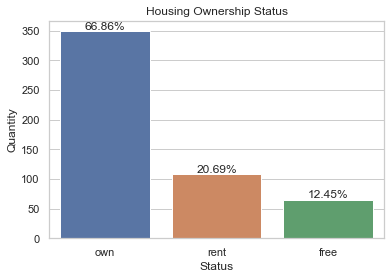

In [8]:
housing_dist = credit["Housing"].value_counts()

total = len(credit)
ax = sns.barplot(housing_dist.index, housing_dist)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
plt.title("Housing Ownership Status")
plt.xlabel("Status")
plt.ylabel("Quantity")
plt.show()

In [9]:
X = credit[["Age", "Credit amount", "Job"]]
y = credit["Housing"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN model accuracy score is {}".format(knn.score(X_test, y_test)))



KNN model accuracy score is 0.5419847328244275


In [11]:
y_pred = knn.predict(X_test)
accuracy1 = metrics.classification_report(y_test, y_pred, output_dict=True)
accuracy1 = pd.DataFrame(accuracy1).transpose()
print(tabulate(accuracy1, headers="keys", tablefmt="github"))

|              |   precision |   recall |   f1-score |    support |
|--------------|-------------|----------|------------|------------|
| free         |    0.15     | 0.157895 |   0.153846 |  19        |
| own          |    0.647619 | 0.809524 |   0.719577 |  84        |
| rent         |    0        | 0        |   0        |  28        |
| accuracy     |    0.541985 | 0.541985 |   0.541985 |   0.541985 |
| macro avg    |    0.265873 | 0.322473 |   0.291141 | 131        |
| weighted avg |    0.437023 | 0.541985 |   0.483722 | 131        |


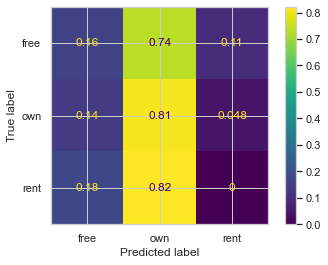

In [12]:
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(knn, X_test, y_test, normalize="true")
plt.show()


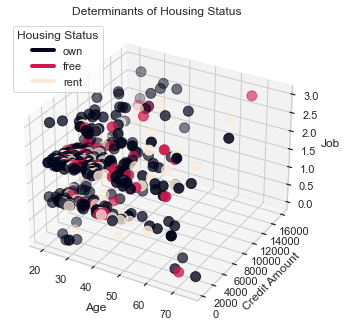

In [13]:
colours = pd.concat([y_train, credit["Housing_lbl"]], axis=1, join="inner")
colours = colours.sort_index(axis=0)

fig = plt.figure(figsize=(7,5.5))
ax = fig.add_subplot(111, projection="3d")
g = ax.scatter(X_train["Age"], X_train["Credit amount"], X_train["Job"], c=colours["Housing_lbl"], marker="o", s=100)
ax.set_xlabel("Age")
ax.set_ylabel("Credit Amount")
ax.set_zlabel("Job")
plt.title("Determinants of Housing Status")


col = g.get_facecolors().tolist()
custom_lines = [Line2D([0], [0], color=(col[0][:-1]), lw=4),
                Line2D([0], [0], color=(col[1][:-1]), lw=4),
                Line2D([0], [0], color=(col[2][:-1]), lw=4)]
ax.legend(custom_lines, housing_type.keys(), loc="upper left", title="Housing Status")

plt.show()

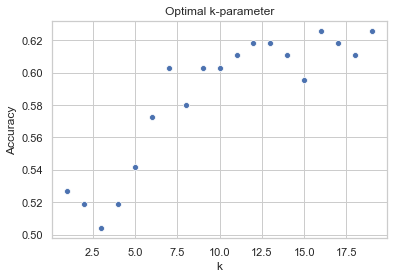

In [14]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

ax = sns.scatterplot(x=k_range, y=scores)
plt.title("Optimal k-parameter")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

Accuracy of Logistic regression classifier on training set: 0.68
Accuracy of Logistic regression classifier on test set: 0.66


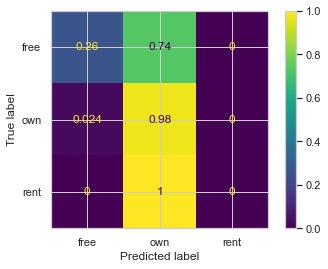

In [15]:
clf = LogisticRegression(max_iter=1000, C=100).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))

y_pred_log = clf.predict(X_test)

confusion_matrix(y_test, y_pred_log)
plot_confusion_matrix(clf, X_test, y_test, normalize="true")
plt.show()